<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/marketing/blob/main/customer_analytics_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="display:fill;
           border-radius:5px;
           background-color:#63595C;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align: center">

<h1 style="padding: 20px;
              color:#F0EDEE;">
              Table of Contents
</h1>
</div>

1. [Importing Libraries](#libraries)
2. [Loading Data](#loading)
3. [Data Cleaning](#cleaning)
4. [Preprocessing](#preprocessing)
5. [Classification Modelings](#classification)
    2. [Logistic Regression](#logistic_regression)
    3. [SVC](#svc)
    4. [Random Forest](#rf)
    5. [XGBoost](#xgboost)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<div style="display:fill;
           border-radius:5px;
           background-color:#63595C;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align: center">

<h1 style="padding: 20px;
              color:#F0EDEE;">
              1- Importing Libararies
</h1>
<a class="anchor" id="libraries"></a>
</div>

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    accuracy_score,
    precision_score,
    recall_score
)
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder

from sklearn.svm import SVC

from typing import Tuple

In [5]:
# To ignore warinings
import warnings
warnings.filterwarnings('ignore')

<div style="display:fill;
           border-radius:5px;
           background-color:#63595C;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align: center">

<h1 style="padding: 20px;
              color:#F0EDEE;">
              2- Loading Data
</h1>
<a class="anchor" id="loading"></a>
</div>

In [6]:
df = pd.read_csv('/content/drive/MyDrive/marketing/shopping_trends_updated.csv')
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [7]:
df.duplicated().any()

False

In [8]:
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


In [9]:
for col in df.columns:
  if df[col].dtype == object:
    print(df[col].value_counts())
    print('**********************')

Gender
Male      2652
Female    1248
Name: count, dtype: int64
**********************
Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64
**********************
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64
**********************
Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
Nebraska          87
New York          87
Nevada            87
Maryland          86
Delaware          86
Vermont           85
L

In [10]:
df['Customer ID'].value_counts()

,count
Customer ID,
1,1
2621,1
2593,1
2594,1
2595,1
...,...
1305,1
1306,1
1307,1


In [11]:
# Color palette used for designing markdowns and the plots in this notebook

colors=['#F5E3E0', '#E8B4BC', '#D282A6', '#6E4555', '#3A3238', '#63595C', '#F0EDEE']

<div style="display:fill;
           border-radius:5px;
           background-color:#63595C;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align: center">

<h1 style="padding: 20px;
              color:#F0EDEE;">
              3- Data Cleaning
</h1>
<a class="anchor" id="cleaning"></a>
</div>

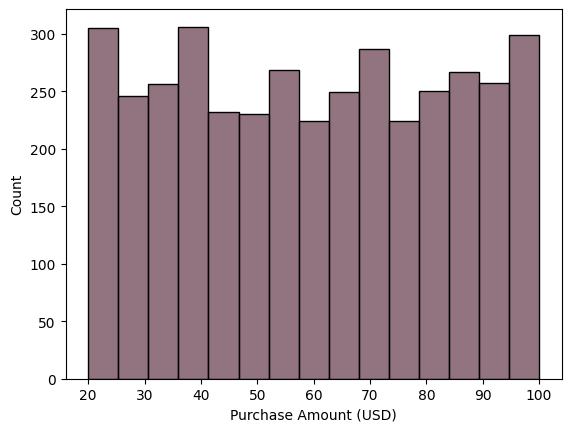

In [12]:
sns.histplot(df['Purchase Amount (USD)'], color='#6E4555')
plt.show()

One of the targets we can consider for this dataset is purchased amount. The above histogram shows us that we can split the whole interval from 20 to 100$ to 2 intervals in which the data is distributed almost uniformly.

In [13]:
def get_customer_type(x: int):
    """Splits cusomers into 2 groups based on the purchased amount in USD"""
    if x <= 60:
        return 'low'
    else:
        return 'high'

df['Customer purchased amount'] = df['Purchase Amount (USD)'].apply(get_customer_type)

df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Customer purchased amount
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,low
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,high
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,high
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,high
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly,low
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,low
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly,low
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly,high


<Axes: xlabel='Customer purchased amount', ylabel='count'>

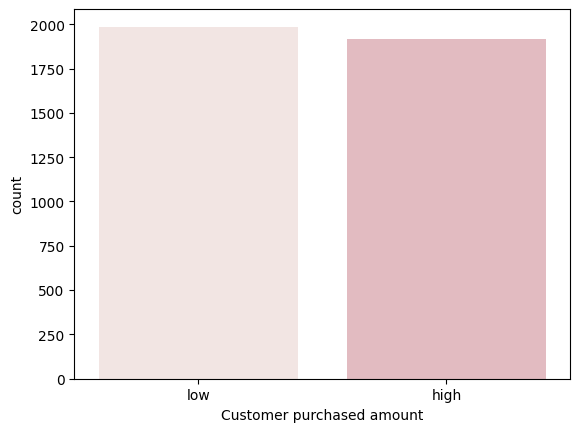

In [14]:
sns.countplot(data=df, x='Customer purchased amount', palette=colors)

In [15]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Customer ID,3900.0,NaN,NaN,NaN,1950.5,1125.977353,1.0,975.75,1950.5,2925.25,3900.0
Age,3900.0,NaN,NaN,NaN,44.068462,15.207589,18.0,31.0,44.0,57.0,70.0
Gender,3900,2,Male,2652,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item Purchased,3900,25,Blouse,171,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,3900,4,Clothing,1737,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Purchase Amount (USD),3900.0,NaN,NaN,NaN,59.764359,23.685392,20.0,39.0,60.0,81.0,100.0
Location,3900,50,Montana,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,3900,4,M,1755,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Color,3900,25,Olive,177,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Season,3900,4,Spring,999,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_cleaned = df.copy()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer ID                3900 non-null   int64  
 1   Age                        3900 non-null   int64  
 2   Gender                     3900 non-null   object 
 3   Item Purchased             3900 non-null   object 
 4   Category                   3900 non-null   object 
 5   Purchase Amount (USD)      3900 non-null   int64  
 6   Location                   3900 non-null   object 
 7   Size                       3900 non-null   object 
 8   Color                      3900 non-null   object 
 9   Season                     3900 non-null   object 
 10  Review Rating              3900 non-null   float64
 11  Subscription Status        3900 non-null   object 
 12  Shipping Type              3900 non-null   object 
 13  Discount Applied           3900 non-null   objec

In [17]:
df_cleaned.drop(['Customer ID', 'Item Purchased', 'Location', 'Color', 'Promo Code Used',
                 'Gender', 'Category', 'Size', 'Subscription Status', 'Purchase Amount (USD)'], axis=1, inplace=True)
df_cleaned.head(3)

,Age,Season,Review Rating,Shipping Type,Discount Applied,Previous Purchases,Payment Method,Frequency of Purchases,Customer purchased amount
0,55,Winter,3.1,Express,Yes,14,Venmo,Fortnightly,low
1,19,Winter,3.1,Express,Yes,2,Cash,Fortnightly,high
2,50,Spring,3.1,Free Shipping,Yes,23,Credit Card,Weekly,high


<h3 style="color:#6E4555;">
              Train Test Split
</h3>
<a class="anchor" id="feature_selection"></a>

In [18]:
targets = df_cleaned['Customer purchased amount']
inputs = df_cleaned.drop('Customer purchased amount', axis=1)

In [19]:
categorical_features = []
numerical_features = []

for col in inputs.columns:
  if inputs[col].dtype == 'object':
    categorical_features.append(col)
  else:
    numerical_features.append(col)
print(len(numerical_features), len(categorical_features))

3 5


<div style="display:fill;
           border-radius:5px;
           background-color:#63595C;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align: center">

<h1 style="padding: 20px;
              color:#F0EDEE;">
              4- Preprocessing
</h1>
<a class="anchor" id="preprocessing"></a>
</div>

In [20]:
#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(inputs[categorical_features])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
categorical_features_encoded = encoder.get_feature_names_out(categorical_features)
print('categorical_features_encoded = ', categorical_features_encoded)
one_hot_df = pd.DataFrame(one_hot_encoded, columns=categorical_features_encoded)

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([inputs, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_features, axis=1)

# Display the resulting dataframe
df_encoded

categorical_features_encoded =  ['Season_Fall' 'Season_Spring' 'Season_Summer' 'Season_Winter'
 'Shipping Type_2-Day Shipping' 'Shipping Type_Express'
 'Shipping Type_Free Shipping' 'Shipping Type_Next Day Air'
 'Shipping Type_Standard' 'Shipping Type_Store Pickup'
 'Discount Applied_No' 'Discount Applied_Yes'
 'Payment Method_Bank Transfer' 'Payment Method_Cash'
 'Payment Method_Credit Card' 'Payment Method_Debit Card'
 'Payment Method_PayPal' 'Payment Method_Venmo'
 'Frequency of Purchases_Annually' 'Frequency of Purchases_Bi-Weekly'
 'Frequency of Purchases_Every 3 Months'
 'Frequency of Purchases_Fortnightly' 'Frequency of Purchases_Monthly'
 'Frequency of Purchases_Quarterly' 'Frequency of Purchases_Weekly']


,Age,Review Rating,Previous Purchases,Season_Fall,Season_Spring,Season_Summer,Season_Winter,Shipping Type_2-Day Shipping,Shipping Type_Express,Shipping Type_Free Shipping,...,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,55,3.1,14,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,19,3.1,2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,50,3.1,23,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,21,3.5,49,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,45,2.7,31,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,40,4.2,32,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3896,52,4.5,41,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3897,46,2.9,24,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3898,44,3.8,24,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded, targets, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3120, 28), (3120,), (780, 28), (780,))

In [22]:
# Define preprocessing steps
numerical_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
])

In [23]:
# Combine preprocessing steps; with this code you can easily add categorical preprocessing steps
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
])

In [24]:
# Apply preprocessing separately to train ant test
# NOTE: If you perform these preprocessings before splitting, it might cause data leakage and overfitting

data_preprocessed_train = X_train.copy()
data_preprocessed_train = preprocessor.fit_transform(data_preprocessed_train)
print("Features after preprocessing for Train Set:", data_preprocessed_train.shape)

data_preprocessed_test = X_test.copy()
data_preprocessed_test = preprocessor.fit_transform(data_preprocessed_test)
print("Features after preprocessing for Test Set:", data_preprocessed_test.shape)

Features after preprocessing for Train Set: (3120, 3)
Features after preprocessing for Test Set: (780, 3)


In [25]:
# Access the feature names after preprocessing; If you have one hot encoding or variance_thresholding for example,
# the column names change and you need to access the new column names in this way

final_numerical_features = list(preprocessor.transformers_[0][1]\
    ['scaler'].get_feature_names_out(numerical_features))
final_numerical_features

['Age', 'Review Rating', 'Previous Purchases']

In [26]:
X_train.index = np.arange(len(X_train))
X_test.index = np.arange(len(X_test))

y_train.index = np.arange(len(y_train))
y_test.index = np.arange(len(y_test))

In [27]:
df_preprocessed_train = pd.DataFrame(data_preprocessed_train, columns=final_numerical_features)
X_train = pd.concat([df_preprocessed_train, X_train[categorical_features_encoded]], axis=1)

df_preprocessed_test = pd.DataFrame(data_preprocessed_test, columns=final_numerical_features)
X_test = pd.concat([df_preprocessed_test, X_test[categorical_features_encoded]], axis=1)

In [28]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3120, 28), (3120,), (780, 28), (780,))

<h3 style="color:#6E4555;">
              Feature Selection
</h3>
<a class="anchor" id="feature_selection"></a>

In [29]:
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_train_encoded = le.fit_transform(y_train)
y_train_encoded

array([0, 0, 0, ..., 0, 0, 1])

In [30]:
imp = mutual_info_regression(X_train, y_train_encoded)
imp_df = pd.DataFrame(imp, index=X_train.columns)
imp_df.columns = ['importance']
imp_df.sort_values(by='importance', ascending=False, inplace=True)
imp_df

,importance
Payment Method_PayPal,0.025144
Frequency of Purchases_Monthly,0.023889
Payment Method_Venmo,0.016563
Shipping Type_Next Day Air,0.015320
Shipping Type_Express,0.012923
Discount Applied_No,0.007603
Frequency of Purchases_Weekly,0.007232
Season_Fall,0.007122
Frequency of Purchases_Quarterly,0.006795
Previous Purchases,0.005654


In [31]:
# Filter the DataFrame to get only the rows where 'importance' is 0
zero_importance_features = imp_df.loc[imp_df['importance'] == 0].index.tolist()
X_train.drop(zero_importance_features, axis=1, inplace=True)
X_test.drop(zero_importance_features, axis=1, inplace=True)
zero_importance_features

['Frequency of Purchases_Every 3 Months',
 'Frequency of Purchases_Fortnightly',
 'Frequency of Purchases_Bi-Weekly',
 'Age',
 'Payment Method_Debit Card',
 'Shipping Type_Store Pickup',
 'Shipping Type_Standard',
 'Shipping Type_Free Shipping',
 'Shipping Type_2-Day Shipping',
 'Season_Winter',
 'Season_Summer',
 'Season_Spring',
 'Discount Applied_Yes']

So we only keep the features which have considerable impact on our target

<div style="display:fill;
           border-radius:5px;
           background-color:#63595C;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align: center">

<h1 style="padding: 20px;
              color:#F0EDEE;">
              5- Classification Modelings
</h1>
<a class="anchor" id="classification"></a>
</div>

<div style="display:fill;
           border-radius:5px;
           background-color:#6E4555;
           font-size:80%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align: left">

<h2 style="padding: 10px;
              color:#F0EDEE;">
              5-1- Logistic Regression
</h2>
<a class="anchor" id="logistic_regression"></a>
</div>

In [32]:
model = LogisticRegression()
model.fit(X_train, y_train_encoded)
y_pred = model.predict(X_test)

In [33]:
test_accuracy = accuracy_score(y_test_encoded, y_pred)
test_precision = precision_score(y_test_encoded, y_pred)
test_recall = recall_score(y_test_encoded, y_pred)
test_f1 = f1_score(y_test_encoded, y_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision (macro): {test_precision:.4f}")
print(f"Test Recall (macro): {test_recall:.4f}")
print(f"Test F1 Score (macro): {test_f1:.4f}")

Test Accuracy: 0.4885
Test Precision (macro): 0.5270
Test Recall (macro): 0.4881
Test F1 Score (macro): 0.5068


In [34]:
# Generate the classification report
report = classification_report(y_test_encoded, y_pred)
print("Classification Report:\n", report)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.49      0.47       360
           1       0.53      0.49      0.51       420

    accuracy                           0.49       780
   macro avg       0.49      0.49      0.49       780
weighted avg       0.49      0.49      0.49       780

Confusion Matrix:
 [[176 184]
 [215 205]]


Text(77.92222222222227, 0.5, 'predicted label')

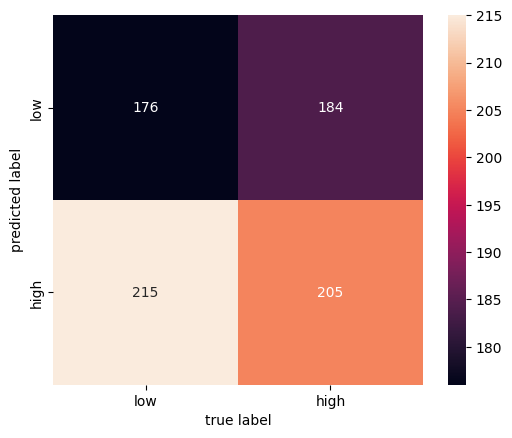

In [35]:
sns.heatmap(conf_matrix, annot=True, square=True, fmt='0.0f',
            xticklabels=y_test.unique(),
            yticklabels=y_test.unique())
plt.xlabel('true label')
plt.ylabel('predicted label')

<div style="display:fill;
           border-radius:5px;
           background-color:#6E4555;
           font-size:80%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align: left">

<h2 style="padding: 10px;
              color:#F0EDEE;">
              5-2- SVC
</h2>
<a class="anchor" id="svc"></a>
</div>

Combining GridSearchCV with cross-validation is a great approach for tuning hyperparameters while evaluating model performance. GridSearchCV inherently uses cross-validation to find the best hyperparameters from a given set of options. Here’s how you can do it with an SVC model:

1. Define the parameter grid: Specify the parameters and their respective values you want to search over.
2. Instantiate the GridSearchCV object: Include the model, parameter grid, and cross-validation strategy.
3. Fit the GridSearchCV object: Train the model and find the best parameters.

In [37]:
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Define the model
svc = SVC()

# Define the cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)
# Change scoring to a list of strings
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=cv, n_jobs=-1, scoring=scoring, refit='accuracy')

# Fit the GridSearchCV object
grid_search.fit(X_train, y_train_encoded)

# Get the best estimator
best_model = grid_search.best_estimator_

**Explanation:** <br>
1. Parameter Grid (param_grid):

 *  Define a dictionary where keys are the parameter names and values are lists of parameter settings to try. For SVC, common parameters to tune include C, gamma, and kernel.
2. Cross-Validation Strategy (cv):

 * KFold is used here to split the data into 5 folds with shuffling and a fixed random state for reproducibility.
3. GridSearchCV:

 * estimator: The base model (SVC in this case).
 * param_grid: The parameter grid defined earlier.
 * cv: Cross-validation strategy.
 * n_jobs: Number of jobs to run in parallel. -1 uses all available processors.
 * scoring: The scoring metric to evaluate the predictions on the test set. it is set to the dictionary of metrics.
 * refit='accuracy' ensures that the model is refit using the parameter setting that maximizes the accuracy score after the grid search is completed. You can change this to any other metric if you want to refit based on a different metric.
4. Fitting the GridSearchCV:

 * The fit method runs the grid search and fits the model with the best parameters found.
5. Best Estimator:

 * best_model retrieves the best model found by GridSearchCV.

In [38]:
y_pred = best_model.predict(X_test)

test_accuracy = accuracy_score(y_test_encoded, y_pred)
test_precision = precision_score(y_test_encoded, y_pred)
test_recall = recall_score(y_test_encoded, y_pred)
test_f1 = f1_score(y_test_encoded, y_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision (macro): {test_precision:.4f}")
print(f"Test Recall (macro): {test_recall:.4f}")
print(f"Test F1 Score (macro): {test_f1:.4f}")

Test Accuracy: 0.4821
Test Precision (macro): 0.5190
Test Recall (macro): 0.5214
Test F1 Score (macro): 0.5202


In [39]:
# Generate the classification report
report = classification_report(y_test_encoded, y_pred)
print("Classification Report:\n", report)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.44      0.44       360
           1       0.52      0.52      0.52       420

    accuracy                           0.48       780
   macro avg       0.48      0.48      0.48       780
weighted avg       0.48      0.48      0.48       780

Confusion Matrix:
 [[157 203]
 [201 219]]


Text(77.92222222222227, 0.5, 'predicted label')

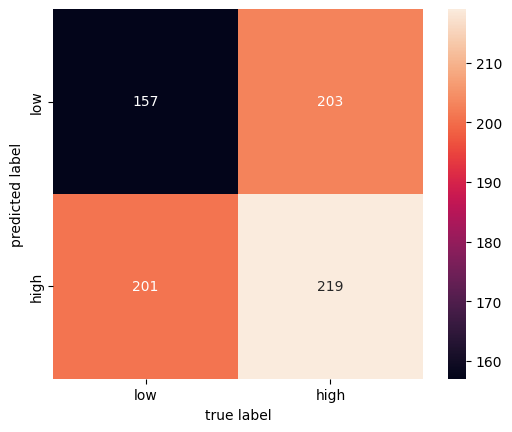

In [40]:
sns.heatmap(conf_matrix, annot=True, square=True, fmt='0.0f',
            xticklabels=y_test.unique(),
            yticklabels=y_test.unique())
plt.xlabel('true label')
plt.ylabel('predicted label')

<div style="display:fill;
           border-radius:5px;
           background-color:#6E4555;
           font-size:80%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align: left">

<h2 style="padding: 10px;
              color:#F0EDEE;">
              5-3- Random Forest
</h2>
<a class="anchor" id="rf"></a>
</div>

Random Forest models have several hyperparameters that can significantly impact their performance, such as the number of trees (n_estimators), the maximum depth of the trees (max_depth), and the number of features to consider when looking for the best split (max_features).

Here's how you can perform training a multiclass Random Forest classifier with cross-validation and using GridSearchCV to optimize hyperparameters with scikit-learn:

1. Define the parameter grid: Specify the parameters and their respective values you want to search over.
2. Instantiate the GridSearchCV object: Include the model, parameter grid, and cross-validation strategy.
3. Fit the GridSearchCV object: Train the model and find the best parameters.
4. Evaluate the model: Generate classification reports and confusion matrices.

In [41]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro'
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=cv, n_jobs=-1, scoring=scoring, refit='accuracy', verbose=0)

# Fit the GridSearchCV object
grid_search.fit(X_train, y_train_encoded)

# Get the best estimator
best_model = grid_search.best_estimator_

**Explanation:** <br>

1. Parameter Grid (param_grid):

 * Defines the range of parameters for the RandomForestClassifier to search over, including n_estimators, max_depth, and max_features.
2. Cross-Validation Strategy (cv):

 * KFold is used here to split the data into 5 folds with shuffling and a fixed random state for reproducibility.
3. Scoring Metrics:

 * The scoring dictionary includes 'accuracy', 'precision_macro', 'recall_macro', and 'f1_macro' as the metrics to be evaluated.
4. GridSearchCV:

 * estimator: The base model (Random Forest in this case).
 * param_grid: The parameter grid defined earlier.
 * cv: Cross-validation strategy.
 * n_jobs: Number of jobs to run in parallel. -1 uses all available processors.
 * scoring: The scoring metric to evaluate the predictions on the test set. Here, 'accuracy' is used for refitting, but you can choose another metric if preferred.
5. Fitting the GridSearchCV:

 * The fit method runs the grid search and fits the model with the best parameters found.
6. Best Estimator:

 * best_model retrieves the best model found by GridSearchCV.

In [42]:
y_pred = best_model.predict(X_test)

test_accuracy = accuracy_score(y_test_encoded, y_pred)
test_precision = precision_score(y_test_encoded, y_pred)
test_recall = recall_score(y_test_encoded, y_pred)
test_f1 = f1_score(y_test_encoded, y_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision (macro): {test_precision:.4f}")
print(f"Test Recall (macro): {test_recall:.4f}")
print(f"Test F1 Score (macro): {test_f1:.4f}")

Test Accuracy: 0.5218
Test Precision (macro): 0.5558
Test Recall (macro): 0.5571
Test F1 Score (macro): 0.5565


In [43]:
# Generate the classification report
report = classification_report(y_test_encoded, y_pred)
print("Classification Report:\n", report)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.48      0.48       360
           1       0.56      0.56      0.56       420

    accuracy                           0.52       780
   macro avg       0.52      0.52      0.52       780
weighted avg       0.52      0.52      0.52       780

Confusion Matrix:
 [[173 187]
 [186 234]]


Text(77.92222222222227, 0.5, 'predicted label')

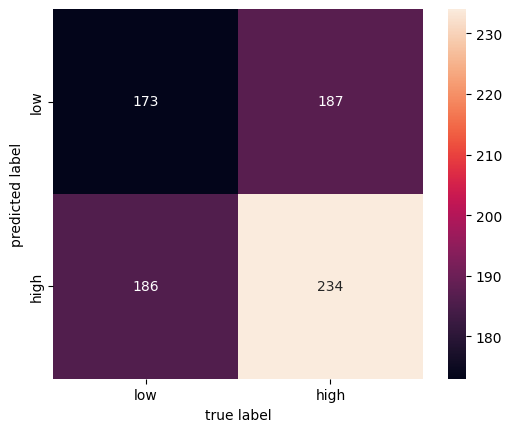

In [44]:
sns.heatmap(conf_matrix, annot=True, square=True, fmt='0.0f',
            xticklabels=y_test.unique(),
            yticklabels=y_test.unique())
plt.xlabel('true label')
plt.ylabel('predicted label')

<div style="display:fill;
           border-radius:5px;
           background-color:#6E4555;
           font-size:80%;
           font-family:Verdana;
           letter-spacing:0.5px;
           text-align: left">

<h2 style="padding: 10px;
              color:#F0EDEE;">
              5-4- XGBoost
</h2>
<a class="anchor" id="xgboost"></a>
</div>

XGBoost is a powerful boosting algorithm that has several hyperparameters that can be fine-tuned to achieve better performance.

1. Define the parameter grid: Specify the parameters and their respective values you want to search over.

2. Instantiate the GridSearchCV object: Include the model, parameter grid, and cross-validation strategy.

3. Fit the GridSearchCV object: Train the model and find the best parameters.

4. Evaluate the model: Generate classification reports and confusion matrices.


In [45]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Define the model
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=2, use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Define the cross-validation strategy
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro'
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=cv, n_jobs=-1, scoring=scoring, refit='accuracy', verbose=1)

# Fit the GridSearchCV object
grid_search.fit(X_train, y_train_encoded)

# Get the best estimator
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


**Explanation:** <br>
1. Parameter Grid (param_grid):

 * Defines the range of parameters for the XGBClassifier to search over, including n_estimators, max_depth, learning_rate, subsample, and colsample_bytree.
2. Cross-Validation Strategy (cv):

 * KFold is used here to split the data into 5 folds with shuffling and a fixed random state for reproducibility.
3. Scoring Metrics:

 * The scoring dictionary includes 'accuracy', 'precision_macro', 'recall_macro', and 'f1_macro' as the metrics to be evaluated.
4. GridSearchCV:

 * estimator: The base model (XGBoost in this case).
 * param_grid: The parameter grid defined earlier.
 * cv: Cross-validation strategy.
 * n_jobs: Number of jobs to run in parallel. -1 uses all available processors.
 * scoring: The scoring metric to evaluate the predictions on the test set. Here, 'accuracy' is used for refitting, but you can choose another metric if preferred.
5. Fitting the GridSearchCV:

 * The fit method runs the grid search and fits the model with the best parameters found.
6. Best Estimator:

 * best_model retrieves the best model found by GridSearchCV.

In [46]:
y_pred = best_model.predict(X_test)

test_accuracy = accuracy_score(y_test_encoded, y_pred)
test_precision = precision_score(y_test_encoded, y_pred)
test_recall = recall_score(y_test_encoded, y_pred)
test_f1 = f1_score(y_test_encoded, y_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Precision (macro): {test_precision:.4f}")
print(f"Test Recall (macro): {test_recall:.4f}")
print(f"Test F1 Score (macro): {test_f1:.4f}")

Test Accuracy: 0.5282
Test Precision (macro): 0.5644
Test Recall (macro): 0.5429
Test F1 Score (macro): 0.5534


In [47]:
# Generate the classification report
report = classification_report(y_test_encoded, y_pred)
print("Classification Report:\n", report)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.51      0.50       360
           1       0.56      0.54      0.55       420

    accuracy                           0.53       780
   macro avg       0.53      0.53      0.53       780
weighted avg       0.53      0.53      0.53       780

Confusion Matrix:
 [[184 176]
 [192 228]]


Text(77.92222222222227, 0.5, 'predicted label')

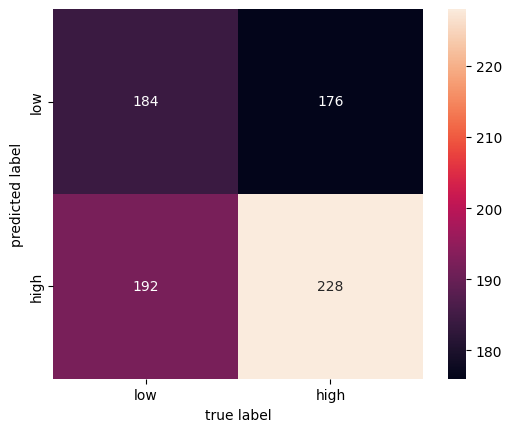

In [48]:
sns.heatmap(conf_matrix, annot=True, square=True, fmt='0.0f',
            xticklabels=y_test.unique(),
            yticklabels=y_test.unique())
plt.xlabel('true label')
plt.ylabel('predicted label')

In [49]:
# TODO; Ensemble, Coming Soon :)))))